In [68]:
%matplotlib inline
import nltk
import os
import sys
import inspect
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error
from sklearn import datasets, linear_model
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from  numpy.linalg import norm
import math
import time
from cvxopt import matrix
from cvxopt import solvers
solvers.options['show_progress'] = False
from cvxopt import solvers, lapack, matrix, spmatrix
import warnings
warnings.filterwarnings('ignore')
import elm

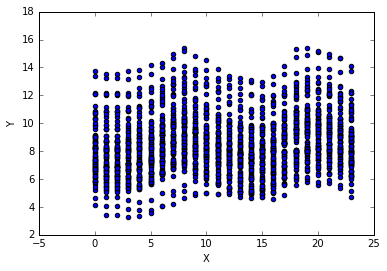

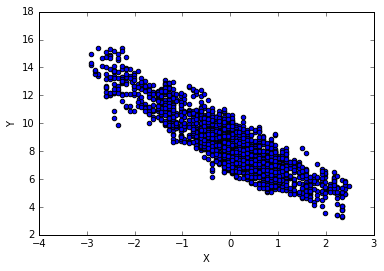

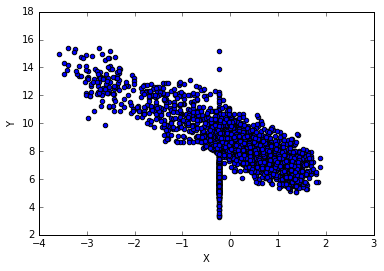

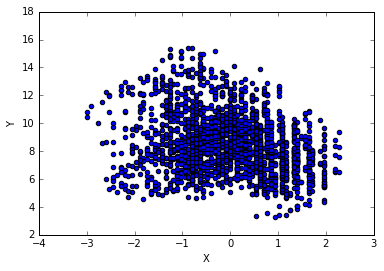

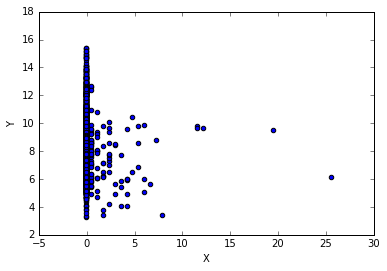

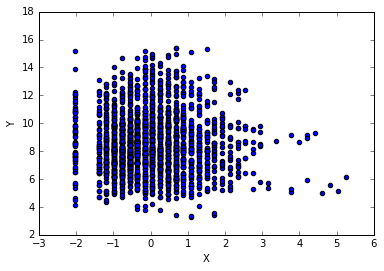

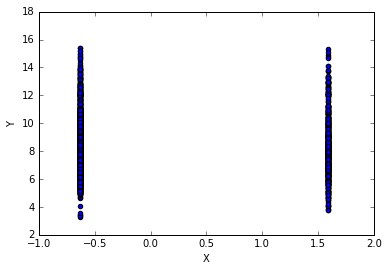

In [37]:
def getDataMatrices(filename):
    mat = np.loadtxt(filename, comments='#', dtype='float64',delimiter=',')
    return mat[:,3:-1], mat[:,-1:]           

def plot2DGraph(X,Y):
    plt.figure()
    plt.scatter(X,Y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def plot2DGraphLine(X,Y):
    plt.figure()
    plt.plot(X,Y,'r.-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
    
def normalizeFeatures(X):
    average_vec = np.sum(X,axis=0)/X.shape[0]
    std_dev = np.std(X,axis=0)
    std_dev[0] = 1
    average_vec[0] = 0
    return (X-average_vec)/ std_dev

def calculateRSE(y_actual,predicted):
    dev_mat  = y_actual- predicted
    Y_avg = np.sum(y_actual)/len(y_actual)
    return np.sum(np.square(dev_mat))/np.sum(np.square(y_actual-Y_avg))


X,Y = getDataMatrices('actual_data.csv')

X = normalizeFeatures(X)

#Time of the day vs power usage
plot2DGraph(X[:,0],Y)

#Temperature vs power usage
plot2DGraph(X[:,1],Y)

#Windchill vs power usage
plot2DGraph(X[:,2],Y)

#Humidity vs power usage
plot2DGraph(X[:,3],Y)

#Precipitation vs power usage
plot2DGraph(X[:,4],Y)

#Windspeed vs power usage
plot2DGraph(X[:,5],Y)

#day of the week vs power usage
plot2DGraph(X[:,6],Y)


90
*************************************************************
Results for Locally Weighted regression:
Training RMSE: 0.975068905847
Training Relative Square error: 0.290006532159


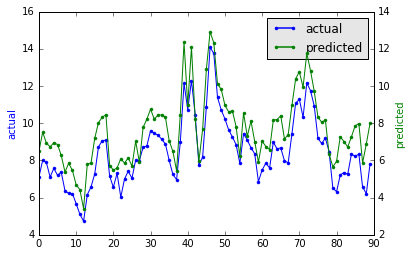

*************************************************************


In [23]:
class LWRegression():
    def __init__(self):
        self.theta = np.array([])
        self.M = 0
        
    def getWindowMatrix(self,X,hour):
        W = np.zeros((self.M,self.M),dtype=np.float)
        
        for i in range(0,self.M):
            if(X[i][0] == hour):
                W[i][i] = 1
        return W

    def predict(self,X,Y,x):
        poly = PolynomialFeatures(1)
        Z = poly.fit_transform(X[:,1:])
        
        self.M = X.shape[0]
        W = lwr.getWindowMatrix(X,x[0])
        
        self.theta = np.dot(np.dot(np.dot(inv(np.dot(np.dot(Z.T,W),Z)),Z.T),W),Y)
        
        return np.dot(x,self.theta)
         
lwr = LWRegression()

x_predict = X[X[:,0] == X[23][0]]   
x_predict = x_predict[:,1:]
        
poly = PolynomialFeatures(1)
z_predict = poly.fit_transform(x_predict)

y_predicted = []
for row in range(0,z_predict.shape[0]):
    y_predicted.append(lwr.predict(X,Y,z_predict[row]))

y_actual  = Y[X[:,0] == X[23][0]]

print "*************************************************************"
print "Results for Locally Weighted regression:"
print "Training RMSE: " + str(math.sqrt(mean_squared_error(y_actual,y_predicted)))
print "Training Relative Square error: " + str(calculateRSE(y_actual, y_predicted))

plot_trends(y_actual, y_predicted, "actual", "predicted")

print "*************************************************************"

In [51]:
def generate_data(hour,filename = "actual_data.csv"):
    data = np.loadtxt(filename,comments='#', dtype='float64', delimiter=",")
    data=data[:, 3:11]
    data1  = data[data[:,0] == hour]
    data1=data1[:, 1:8]
    y_1=data1[:, 6]
    data1=data1[:, 0:6]
    data1=normalize_x(data1)
    return data1, y_1;

def normalize_x(X):
    average_vec = np.sum(X,axis=0)/X.shape[0]
    std_dev = np.std(X,axis=0)
    return (X-average_vec)/ std_dev

def plot_trends(y1, y2, label1, label2):
    # Plot two trends with different y-scales
    fig, ax1 = plt.subplots()
    l1=ax1.plot(y1, 'b.-', label=label1)
    ax1.set_ylabel(label1, color='b')
    #plt.xticks(range(len(x))[::1], x[::1], rotation='90')
    ax2 = ax1.twinx()
    l2=ax2.plot(y2, 'g.-', label=label2)
    ax2.set_ylabel(label2, color='g')
    lgs=l1+l2;
    lg = [l.get_label() for l in lgs]
    legend= ax1.legend(lgs, lg, loc=0)
    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    frame.set_facecolor('0.90')

    # Set the fontsize
    for label in legend.get_texts():
        label.set_fontsize('large')

    for label in legend.get_lines():
        label.set_linewidth(1.5)  # the legend line width
    #plt.axvline(70,color='k', linestyle='--')
    plt.show()
    
    
def do_cross_val(X, y, nfolds,model):
    deviations=[]
    relative_square_error = []
    cv = KFold(len(y), nfolds, shuffle=True)
    for train_idx, test_idx in cv:
        model.fit(X[train_idx], y[train_idx])
        predicted = np.zeros(Y[test_idx].shape[0])
        for i in range(0,X[test_idx].shape[0]):
            predicted[i] = model.predict(X[i])
            
        dev_mat  = y[test_idx]- predicted
        Y_avg = np.sum(y[test_idx])/len(y[test_idx])
        relative_square_error.append(np.sum(np.square(dev_mat))/np.sum(np.square(y[test_idx]-Y_avg)))
    return relative_square_error


*************************************************************
Results for Locally Weighted regression:
Training RMSE: 0.649443006613


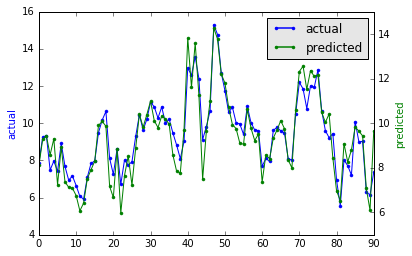

Relative square error for 10 folds cross validation: 
[1.7038749270594322, 1.2101244401632041, 1.7290449306133844, 1.0988947349350315, 0.9160476443900164, 1.0226488417878015, 1.0658177221258975, 1.649209640784475, 2.0510863635730425, 3.2044629863742955]
Average RSE on testing data: 1.56512122318
*************************************************************


In [52]:
class MLPRegression():
    def __init__(self):
        self.V = []   #key ranges from 0 to K-1
        self.H = 12 # number of interim outputs
        self.W = {} # key ranges from 0 to H-1
        self.M = 0 # number of examples
        self.step_size = 0.0005
        
        #initialize V 
        self.V= np.full((self.H+1),0.01)
            
    def calc_likelihood(self,theta,x):
        return (1/(1+math.exp(-(np.dot(theta,x)))))
    
    
    def predict(self,x):
        Z = np.ones(self.H+1)
        for j in range(1,self.H+1):
            Z[j]=self.calc_likelihood(self.W[j-1],x)
        return np.dot(self.V.T,Z)
    
    def fit(self,X,Y):
        self.M = X.shape[0]
        #initialize W
        for interim_class in range(0,self.H):
            self.W[interim_class]= np.full((X.shape[1]),0.01)
                
        iteration_count=0    
        while(iteration_count<300):
            #gradient descend on V        
            summation_arr = np.zeros(self.H+1) 
            for i in range(0,self.M):
                Z = np.ones(self.H+1)
                for j in range(1,self.H+1):
                    Z[j]=self.calc_likelihood(self.W[j-1],X[i])
                summation_arr += np.dot(np.dot(self.V.T,Z)-Y[i],Z)
            self.V -= self.step_size * summation_arr
                
            #gradient descned on W    
            for hidden_cls in range (1,self.H+1):
                w_gradient = np.zeros(X.shape[1])
                for i in range(0,self.M):
                    Z = np.ones(self.H+1)
                    for j in range(1,self.H+1):
                        Z[j]=self.calc_likelihood(self.W[j-1],X[i])
                    w_gradient += ((np.dot(self.V.T,Z)-Y[i])*self.V[hidden_cls]*Z[hidden_cls]*(1-Z[hidden_cls]))*X[i]
                self.W[hidden_cls-1] -= self.step_size*w_gradient
                
            iteration_count += 1

X,Y = generate_data(18)
mlp = MLPRegression()
mlp.fit(X,Y)
y_predicted = np.zeros(Y.shape[0])

for i in range(0,X.shape[0]):
    y_predicted[i] = mlp.predict(X[i])

print "*************************************************************"
print "Results for Locally Weighted regression:"
print "Training RMSE: " + str(math.sqrt(mean_squared_error(Y,y_predicted)))

plot_trends(Y, y_predicted, "actual", "predicted")

print "Relative square error for 10 folds cross validation: "
rel_sqr_error = do_cross_val(X, Y, 10,mlp)
print rel_sqr_error

print "Average RSE on testing data: " + str(sum(rel_sqr_error)/len(rel_sqr_error))
print "*************************************************************"    



*************************************************************
Results for Support Vector Regression:
Training RMSE: 2.40347054496


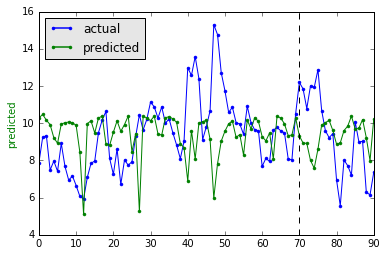

Relative square error for 10 folds cross validation: 
1.48290546


In [66]:
def normalize_x(X):
    average_vec = np.sum(X,axis=0)/X.shape[0]
    std_dev = np.std(X,axis=0)
    return (X-average_vec)/ std_dev

X=normalize_x(X)

def kernel(matrix1, matrix2):
    result=np.exp(-0.0199326884825235 * (np.dot(matrix1, matrix1) + np.dot(matrix2, matrix2) - 2 * np.dot(matrix1, matrix2)))
    return result

def create_gram_matrix(x ):
    gram=np.zeros((x.shape[0],x.shape[0]));
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            gram[i,j]=kernel(x[i],x[j]);
    return gram

def build_support_vectors(x,y):
    m, n = x.shape[0], 2
    A=np.ones((x.shape[0],1))
    A = matrix( np.concatenate((A, np.transpose(np.matrix(y)) ), axis=1))
    b = +y
    xls = matrix(+b)
    lapack.gels(+A, xls)
    xls = xls[:2]
    novars = n+2*m
    P = spmatrix([],[],[], (novars, novars))
    P[n:n+m,n:n+m] = spmatrix(1.0, range(m), range(m))
    q = matrix(0.0, (novars,1))
    q[-m:] = 1.0
    
    G = spmatrix([], [], [], (5*m, novars))
    h = matrix(0.0, (5*m,1))
    G[:m,:n] = A
    G[:m,n:n+m] = spmatrix(-1.0, range(m), range(m))
    G[:m,n+m:] = spmatrix(-1.0, range(m), range(m))
    h[:m] = b
    G[m:2*m,:n] = -A
    G[m:2*m,n:n+m] = spmatrix(-1.0, range(m), range(m))
    G[m:2*m,n+m:] = spmatrix(-1.0, range(m), range(m))
    h[m:2*m] = -b
    G[2*m:3*m,n:n+m] = spmatrix(-1.0, range(m), range(m))
    
    G[3*m:4*m,n:n+m] = spmatrix(1.0, range(m), range(m))
    h[3*m:4*m] = 1.0
    G[4*m:,n+m:] = spmatrix(-1.0, range(m), range(m))
    xh = solvers.qp(P, q, G, h)['x']
    l_multipliers=np.ravel(xh)
    return l_multipliers;
    
def get_support_vectors(multipliers1, x, y):
    support_vectors = multipliers1 > 1e-5
    if(len(support_vectors) > 1):
        support_vectors= support_vectors[0:x.shape[0]]
    index_of_nz_sv = np.arange(len(multipliers1))[support_vectors]
    multipliers = multipliers1[support_vectors]
    support_vec = x[support_vectors]
    support_vec_y = y[support_vectors]
    return support_vectors, index_of_nz_sv, multipliers, support_vec, support_vec_y

def calc_b(support_vec, support_vec_y, multipliers, gram, index_of_nz_sv, support_vectors):
    b=0;
    for i in range(len(multipliers)):
        b=b+support_vec_y[i];
        b=b-np.sum(multipliers*support_vec_y*gram[index_of_nz_sv[i], support_vectors])
    b=1.*b/len(multipliers);
    return b;

def calc_w(x, multipliers, support_vec, support_vec_y ):
    w=np.zeros(x.shape[1]);
    for i in range(len(multipliers)):
        w=w+multipliers[i]*support_vec_y[i]*support_vec[i]
    return w;

def predict(x,multipliers, support_vec, support_vec_y, w, b):
    y_predicted=np.zeros(x.shape[0]);
    for i in range(x.shape[0]):
        s=0;
        for a, sv_y, sv in zip(multipliers, support_vec_y, support_vec):
            s=s+a*sv_y*kernel(x[i], sv);
        y_predicted[i]=s;
    y_predicted=y_predicted+b;
    return(y_predicted);

def plot_svm(X1_train, w, b,support_vec):
        plt.plot(X1_train[:,0], X1_train[:,1], "ro")
        plt.scatter(support_vec[:,0], support_vec[:,1], s=100, c="g")
        a0 = -4; 
        a1 = f(a0, w, b)
        b0 = 4; 
        b1 = f(b0, w, b)
        plt.plot([a0,b0], [a1,b1], "k")
        a0 = -4; 
        a1 = f(a0, w, b, 1)
        b0 = 4; 
        b1 = f(b0, w, b, 1)
        plt.plot([a0,b0], [a1,b1], "k--")
        a0 = -4; 
        a1 = f(a0, w, b, -1)
        b0 = 4; 
        b1 = f(b0, w, b, -1)
        plt.plot([a0,b0], [a1,b1], "k--")

        plt.axis("tight")
        plt.show()
        
def f(x, w, b, c=0):
    result= (-w[0] * x - b + c) / w[1]
    return result;

def plot_trends(y1, y2, label1, label2):
    # Plot two trends with different y-scales
    fig, ax1 = plt.subplots()
    l1=ax1.plot(y1, 'b.-', label=label1)
    ax1.set_ylabel(label1, color='b')
    #plt.xticks(range(len(x))[::1], x[::1], rotation='90')
    #ax2 = ax1.twinx()
    ax2 = ax1
    l2=ax2.plot(y2, 'g.-', label=label2)
    ax2.set_ylabel(label2, color='g')
    lgs=l1+l2;
    lg = [l.get_label() for l in lgs]
    legend= ax1.legend(lgs, lg, loc=0)
    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    frame.set_facecolor('0.90')

# Set the fontsize
    for label in legend.get_texts():
        label.set_fontsize('large')

    for label in legend.get_lines():
        label.set_linewidth(1.5)  # the legend line width
    plt.axvline(70,color='k', linestyle='--')
    plt.show()

def do_cross_validation(X, Y,n_folds,verbose=False):
    rse_mean = []
    y_p=[]
    i=1;
    X1, Y1= X, Y
    cv = KFold(len(Y1), n_folds, shuffle=True, random_state=5)
    gram=create_gram_matrix(X)
    multipliers1=build_support_vectors(X,Y)
    support_vectors, index_of_nz_sv, multipliers, support_vec, support_vec_y = get_support_vectors(multipliers1, X, Y)
    b=calc_b(support_vec, support_vec_y, multipliers, gram, index_of_nz_sv, support_vectors)
    w=calc_w(X,  multipliers, support_vec, support_vec_y )
    predicted_y = predict(X,multipliers, support_vec, support_vec_y, w, b )
    print "*************************************************************"
    print "Results for Support Vector Regression:"
    print "Training RMSE: " + str(math.sqrt(mean_squared_error(Y,predicted_y)))
    plot_trends(Y, predicted_y, "actual", "predicted")

    
    for train_idx, test_idx in cv:
        gram=create_gram_matrix(X1[train_idx] )
        multipliers1=build_support_vectors(X1[train_idx],Y1[train_idx])
        support_vectors, index_of_nz_sv, multipliers, support_vec, support_vec_y = get_support_vectors(multipliers1, X1[train_idx],Y1[train_idx])
        b=calc_b(support_vec, support_vec_y, multipliers, gram, index_of_nz_sv, support_vectors)
        w=calc_w(X1[train_idx], multipliers, support_vec, support_vec_y )
        #plot_svm(X1[train_idx][0:2], w, b,support_vec)
        y_p = predict(X1[test_idx],multipliers, support_vec, support_vec_y, w, b)
        dev_mat  = Y1[test_idx]-  y_p
        Y_avg = np.sum(Y1[test_idx])/len(Y1[test_idx])
        rse= (np.sum(np.square(dev_mat))/np.sum(np.square(Y1[test_idx]-Y_avg)))
        rse_mean.append(rse);
        rse=0;
        i=i+1;
        y_p=[]
    rel_sqr_error=np.mean(rse_mean);
    return rel_sqr_error
        

rel_sqr_error = do_cross_validation(X, Y, 10)
print "Relative square error for 10 folds cross validation: "
print rel_sqr_error

*************************************************************
Results for Extreme Learning Machine:
Training RMSE: 0.42462622581


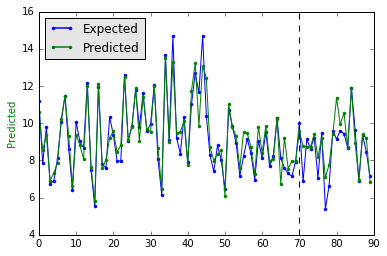

Relative square error for 10 folds cross validation: 
0.340998678048


In [69]:
def generate_data_elm(filename, hour):
    data = elm.read(filename)
    data=data[:, 3:11]
    data1  = data[data[:,0] == hour]
    data1=data1[:, 1:8]
    y_1=data1[:, 6]
    data1=data1[:, 0:6]
    data2=np.column_stack([y_1, data1])
    return data2

X= generate_data_elm("actual_data_space.csv", 22.0)

def elm_regression(X):
    rse_mean = []
    params= ["sigmoid",  1, 500,  True]
    elmk = elm.ELMRandom(params)
    #a= elmk.search_param(X, cv="kfold", of="rmse", eval=10)
    training_set, testing_set = elm.split_sets(X, training_percent=.4, perm=True)
    train_result = elmk.train(training_set)
    test_result = elmk.test(testing_set)
    train_result.calc_metrics()
    rse_train = train_result.dict_errors['rmse']
    print "*************************************************************"
    print "Results for Extreme Learning Machine:"
    print "Training RMSE: " + str(rse_train)
    
    y1=np.concatenate((train_result.expected_targets,  test_result.expected_targets))
    y2=np.concatenate((train_result.predicted_targets, test_result.predicted_targets))
    plot_trends(y1, y2, 'Expected', 'Predicted')
    for i in range(0,10):
        training_set, testing_set = elm.split_sets(X, training_percent=.7, perm=True)
        training_result = elmk.train(training_set)
        testing_result = elmk.test(testing_set)
        dev_mat  = testing_result.expected_targets -  testing_result.predicted_targets 
        Y_avg = np.sum(testing_result.expected_targets )/len(testing_result.expected_targets )
        rse= (np.sum(np.square(dev_mat))/np.sum(np.square(testing_result.expected_targets -Y_avg)))
        rse_mean.append(rse);
        rse=0;
    rel_sqr_error=np.mean(rse_mean);
    return rel_sqr_error
    
rel_sqr_error = elm_regression(X)
print "Relative square error for 10 folds cross validation: "
print rel_sqr_error

********************************************************************
Prediction using LWR: 
[5.6266490739664858, 5.456909709368591, 5.4418865413641813, 5.4707614920267114, 5.3154455651796511, 5.3504395057722514, 5.510385727463353, 5.7241955730089922, 6.009220707557823, 6.0442442037758886, 6.3068971813827321, 6.1972402869082579, 5.9324098218561403, 5.9322013682718007, 5.9322013682718007, 5.9300737945849669, 6.2160171363242238, 6.1679935403587347, 6.296903859944142, 6.4337400415686865, 6.5333810613103811, 6.3929711108435798, 6.3929711108435798, 6.4879281502424897]


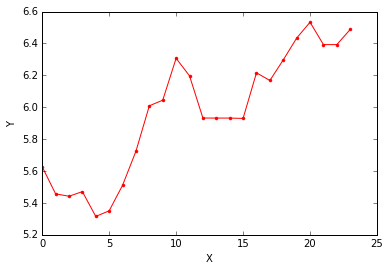

********************************************************************
********************************************************************
Prediction using MLP: 
[1.8144907002081014, 1.6326715099247531, 1.6275369563177664, 1.6506071799099613, 1.6810796911174215, 1.7687827650020722, 1.9209457404476122, 2.0755057001781148, 2.1342209922647579, 2.0346572454179883, 1.9587584248266741, 1.8303621495387059, 1.7523086517050865, 1.6650611208736801, 1.6197173016008124, 1.6432264326201975, 1.720383149669529, 1.9136957157538355, 2.127407127377468, 2.1695052060532376, 2.1802651917885085, 2.161122327199843, 2.0799960027646685, 1.9079178586309942]


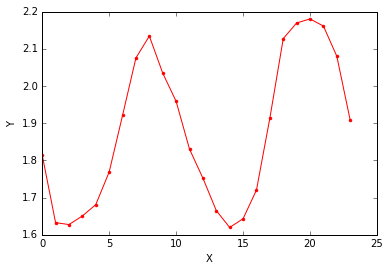

********************************************************************


In [67]:
class PowerConsumptionPredicter():
    def __init__(self):
        self.inp = np.loadtxt("test_input.txt", comments='#', dtype='float64',delimiter=',')
    
    def predict(self):
        #lets predict first using the LWR
        X,Y = getDataMatrices('actual_data.csv')
        lwr = LWRegression()
        y_predicted = []
        
        z_inp = np.copy(self.inp)
        z_inp[:,0] =1
        for i in range(0,self.inp.shape[0]):
            y_predicted.append(lwr.predict(X,Y,z_inp[i])[0])
        
        print "********************************************************************"
        print "Prediction using LWR: "
        print y_predicted
        plot2DGraphLine(self.inp[:,0],y_predicted)
        print "********************************************************************"

        #Lets try the MLP approach
        y_predicted = []
        for i in range(self.inp.shape[0]):
            X,Y = generate_data(i)
            mlp = MLPRegression()
            mlp.fit(X,Y)
            y_predicted.append(mlp.predict(self.inp[:,1:][i]))
        
        print "********************************************************************"
        print "Prediction using MLP: "
        print y_predicted
        plot2DGraphLine(self.inp[:,0],y_predicted)
        print "********************************************************************"
                
        
pcp = PowerConsumptionPredicter()
pcp.predict()